<a href="https://colab.research.google.com/github/sis00211/4dong4dong/blob/main/M%26V_vsOAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
import ipywidgets as widgets
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/EC3_Data")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('EC3_Clean.csv', index_col = "timestamp", parse_dates=True)
df.head(5)

,FacilityName,Year,Month,FY,Avg. OAT,Precipitation (in),HDD,CDD,Electricity Cost ($),Electricity Demand (KW),Electricity Usage (KWH),Gas (Therms),Gas Cost ($),Steam (mlbs),Steam Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,,,,,,,,,,
2023-06-01,115th Street Branch Library,2023,6,2023,NaN,NaN,NaN,NaN,3254.15,57.6,13840.0,0.0,39.32,NaN,NaN,3293.47,47.24
2023-05-01,115th Street Branch Library,2023,5,2023,NaN,NaN,NaN,NaN,2757.40,54.4,9040.0,0.0,34.58,NaN,NaN,2791.98,30.85
2023-04-01,115th Street Branch Library,2023,4,2023,NaN,NaN,NaN,NaN,4787.10,94.4,18240.0,0.0,35.76,NaN,NaN,4822.86,62.25
2023-03-01,115th Street Branch Library,2023,3,2023,NaN,NaN,NaN,NaN,4122.61,56.8,26720.0,0.0,35.76,NaN,NaN,4158.37,91.19
2023-02-01,115th Street Branch Library,2023,2,2023,NaN,NaN,NaN,NaN,6833.75,96.8,24720.0,0.0,39.33,NaN,NaN,6873.08,84.37


In [ ]:
unique_categories = df['FacilityName'].unique()

In [ ]:
def on_dropdown_change(change):
    global selected_category
    selected_category = dropdown.value
    update_filtered_df()

def update_filtered_df():
    global filtered_df
    filtered_df = df[df['FacilityName'] == selected_category]
    print("Selected Category:", selected_category)
    print(filtered_df.info())

In [ ]:
dropdown = widgets.Dropdown(options=unique_categories, description="Select a category:")
dropdown.observe(on_dropdown_change, names='value')

In [ ]:
display(dropdown)

Dropdown(description='Select a category:', index=12, options=('115th Street Branch Library', '125th Street Bra…

In [ ]:
def on_dropdown_change(change):
    selected_category = dropdown.value
    filtered_df = df[df['FacilityName'] == selected_category]
    print("Selected Category:", selected_category)
    print(filtered_df)

In [ ]:
#del filtered_df

Text(0, 0.5, 'Electricity Usage (KWH)')

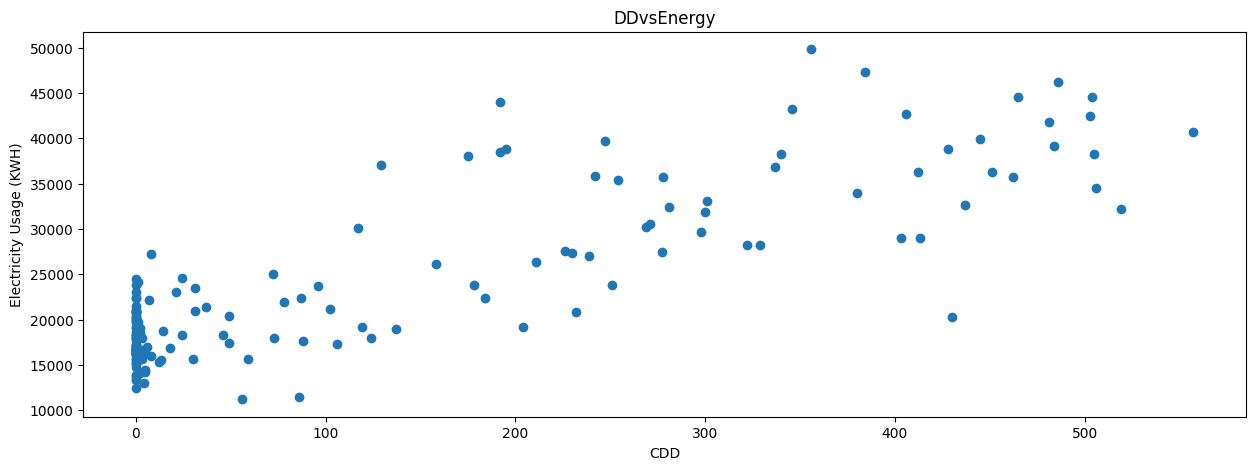

In [ ]:
x = filtered_df['CDD']
y = filtered_df['Electricity Usage (KWH)']
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title ("DDvsEnergy")
plt.xlabel("CDD")
plt.ylabel("Electricity Usage (KWH)")

Text(0, 0.5, 'Gas (Therms)')

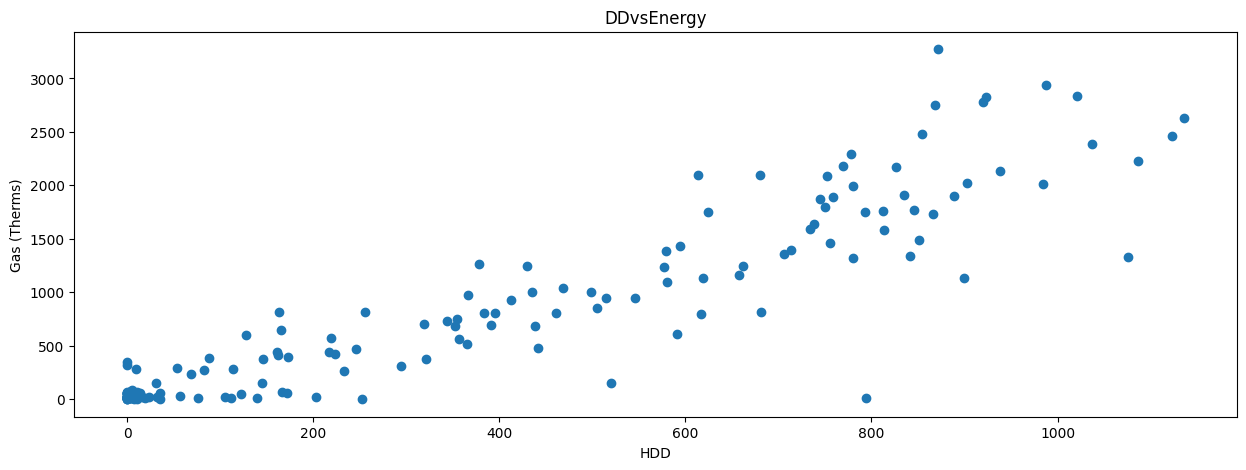

In [ ]:
x = filtered_df['HDD']
y = filtered_df['Gas (Therms)']
plt.figure(figsize=(15,5))
plt.scatter(x,y)
plt.title ("DDvsEnergy")
plt.xlabel("HDD")
plt.ylabel("Gas (Therms)")

In [ ]:
trainingFY = [2016,2017,2018,2019,2020,2021]
testFY = [2022]

In [ ]:
#f_df = df[df['FacilityName'] == "Chatham Square Branch Library"]
f_df = filtered_df
trainingdata = f_df[f_df.index.year.isin(trainingFY)]
testdata= f_df[f_df.index.year.isin(testFY)]

In [ ]:
f_df.head()
testdata.head()

,FacilityName,Year,Month,FY,Avg. OAT,Precipitation (in),HDD,CDD,Electricity Cost ($),Electricity Demand (KW),Electricity Usage (KWH),Gas (Therms),Gas Cost ($),Steam (mlbs),Steam Cost ($),Total Cost ($),Total Usage (mmBTUs)
timestamp,,,,,,,,,,,,,,,,,
2022-12-01,Belmont Branch Library,2022,12,2023,38.5,5.83,841.0,0.0,2906.24,30.4,13280.0,1338.0,2410.67,NaN,NaN,5316.91,179.12
2022-11-01,Belmont Branch Library,2022,11,2023,50.9,3.15,442.0,12.0,3153.15,31.2,15360.0,482.0,946.05,NaN,NaN,4099.20,100.62
2022-10-01,Belmont Branch Library,2022,10,2023,56.9,5.08,252.0,4.0,3556.57,50.4,13040.0,0.0,36.95,NaN,NaN,3593.52,44.51
2022-09-01,Belmont Branch Library,2022,9,2023,69.5,4.10,35.0,158.0,6312.61,94.4,26080.0,0.0,39.33,NaN,NaN,6351.94,89.01
2022-08-01,Belmont Branch Library,2022,8,2023,79.3,1.71,0.0,437.0,6251.43,100.0,32640.0,5.0,44.11,NaN,NaN,6295.54,111.90


In [ ]:
x_train = trainingdata.drop(['Electricity Usage (KWH)','Steam (mlbs)','Steam Cost ($)','FacilityName','Year','Month','FY','Electricity Cost ($)','Electricity Demand (KW)'], axis=1)
y_train = trainingdata['Electricity Usage (KWH)']

In [ ]:
x_test = testdata.drop(['Electricity Usage (KWH)','Steam (mlbs)','Steam Cost ($)','FacilityName','Year','Month','FY','Electricity Cost ($)','Electricity Demand (KW)'], axis=1)
y_test = testdata['Electricity Usage (KWH)']

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
predicted_vs_actual = pd.concat([y_test, pd.DataFrame(y_pred, index=y_test.index)], axis=1)

In [ ]:
predicted_vs_actual.head()

,Electricity Usage (KWH),0
timestamp,,
2022-12-01,13280.0,18671.2
2022-11-01,15360.0,17304.8
2022-10-01,13040.0,19973.6
2022-09-01,26080.0,27453.6
2022-08-01,32640.0,33576.0


In [ ]:
predicted_vs_actual.columns = ["Actual", "Predicted"]
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2022-12-01,13280.0,18671.2
2022-11-01,15360.0,17304.8
2022-10-01,13040.0,19973.6
2022-09-01,26080.0,27453.6
2022-08-01,32640.0,33576.0


<Axes: xlabel='timestamp'>

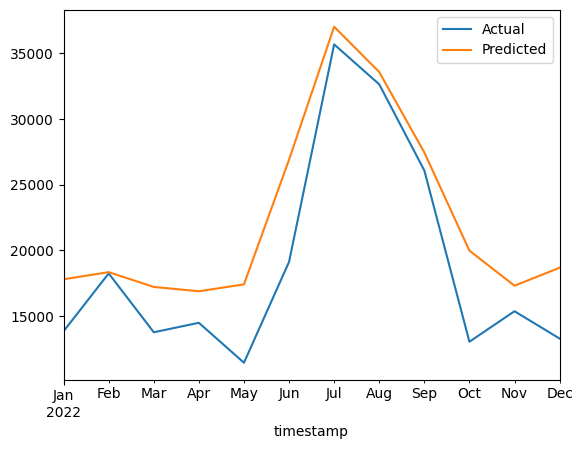

In [ ]:
predicted_vs_actual.plot()

In [ ]:
ytrain_table = pd.DataFrame(y_train)
ytrain_table.columns = ["Actual"]
ytrain_table.head()

,Actual
timestamp,
2021-12-01,14800.0
2021-11-01,12480.0
2021-10-01,21360.0
2021-09-01,44000.0
2021-08-01,42640.0


<Axes: xlabel='timestamp'>

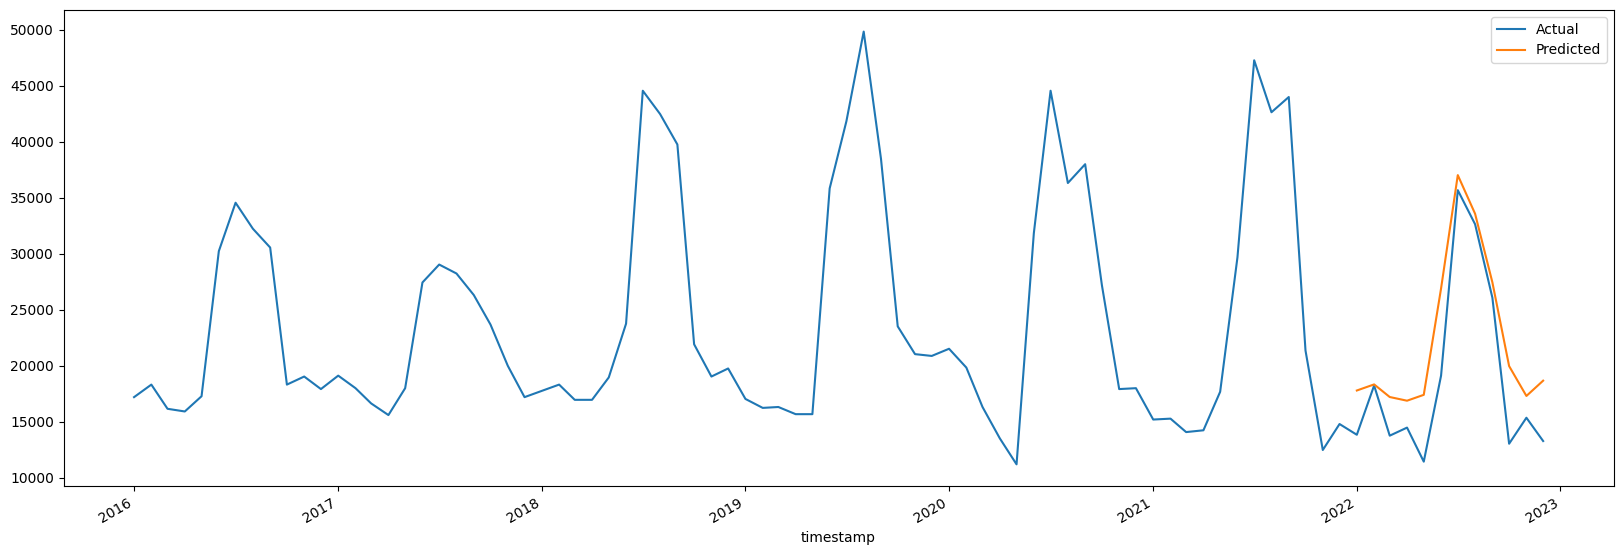

In [ ]:
predicted_vs_actual_plus_training = pd.concat([ytrain_table, predicted_vs_actual], sort=True)
predicted_vs_actual_plus_training.plot(figsize=(20,7))

1. Enable 'Facility' Selection
2. Enable 'Time range' Selection
3. Enable 'Energy Type' Selection
4. Feature Test
5. Performance calculations